In [79]:
"""This file includes the code for image preprocessing, different color space conversion, and color balancing techniques."""

In [ ]:
import pandas  as pd
import numpy as np
import tensorflow
import matplotlib as plt
import seaborn as sns


In [80]:
# import os
# print(os.listdir("../Original_Data_from_Author/Normal"))

PREPROCESSSING THE DATA

In [81]:
import os
import cv2
import pandas as pd

def process_images(folder_path):
    # Initialize an empty DataFrame to store YCbCr values
    ycbcr_df = pd.DataFrame(columns=['Filename', 'Y', 'Cb', 'Cr'])

    # Iterate through the images in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)

            # Read the image using OpenCV
            image = cv2.imread(image_path)

            # Convert the image to YCbCr color space
            ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

            # Get the Y, Cb, and Cr channels
            Y, Cb, Cr = cv2.split(ycbcr_image)

            # Compute the mean values for Y, Cb, and Cr
            mean_Y = Y.mean()
            mean_Cb = Cb.mean()
            mean_Cr = Cr.mean()

            # Create a new row as a dictionary
            new_row = {'Filename': filename, 'Y': mean_Y, 'Cb': mean_Cb, 'Cr': mean_Cr}

            # Concatenate the new row with the existing DataFrame
            ycbcr_df = pd.concat([ycbcr_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)

    # Display the DataFrame
    return ycbcr_df


In [82]:
folder_path = '../Original_Data_from_Author/Normal/normal'
ycbcr=process_images(folder_path)


In [83]:
def process_images_HSV(folder_path):
    # Initialize an empty DataFrame to store HSV values
    hsv_df = pd.DataFrame(columns=['Filename', 'H', 'S', 'V'])

    # Iterate through the images in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)

            # Read the image using OpenCV
            image = cv2.imread(image_path)

            # Convert the image to HSV color space
            hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

            # Get the H, S, and V channels
            H, S, V = cv2.split(hsv_image)

            # Compute the mean values for H, S, and V
            mean_H = H.mean()
            mean_S = S.mean()
            mean_V = V.mean()

            # Create a new row as a dictionary
            new_row = {'Filename': filename, 'H': mean_H, 'S': mean_S, 'V': mean_V}

            # Concatenate the new row with the existing DataFrame
            hsv_df = pd.concat([hsv_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)

    # Display the DataFrame
    return hsv_df


In [84]:
folder_path = '../Original_Data_from_Author/Normal/normal'
hsv = process_images_HSV(folder_path)


In [85]:
combined_df = pd.merge(ycbcr, hsv, on='Filename')

In [86]:
combined_df

,Filename,Y,Cb,Cr,H,S,V
0,normal (1).jpg,157.033465,139.423072,113.942096,36.811427,78.915971,179.486567
1,normal (662).jpg,167.467894,142.196665,111.470392,20.014032,73.673218,187.708630
2,normal (663).jpg,171.483748,142.609640,113.708808,24.449550,72.465665,196.588739
3,normal (661).jpg,140.954229,137.516655,115.513924,31.405358,83.250097,158.574067
4,normal (569).jpg,164.861896,130.975770,124.135343,44.154271,29.538661,172.134013
...,...,...,...,...,...,...,...
555,normal (653).jpg,154.926848,137.276206,115.246786,25.023327,64.867515,169.312626
556,normal (656).jpg,150.208099,138.520594,112.285232,24.939758,76.591482,166.171020
557,normal (655).jpg,135.493572,136.351951,115.213970,30.044555,86.080748,151.267030
558,normal (658).jpg,152.867414,143.137201,110.969336,27.197180,82.395261,174.649664


In [87]:
combined_df['Class'] = 'normal'
combined_df

,Filename,Y,Cb,Cr,H,S,V,Class
0,normal (1).jpg,157.033465,139.423072,113.942096,36.811427,78.915971,179.486567,normal
1,normal (662).jpg,167.467894,142.196665,111.470392,20.014032,73.673218,187.708630,normal
2,normal (663).jpg,171.483748,142.609640,113.708808,24.449550,72.465665,196.588739,normal
3,normal (661).jpg,140.954229,137.516655,115.513924,31.405358,83.250097,158.574067,normal
4,normal (569).jpg,164.861896,130.975770,124.135343,44.154271,29.538661,172.134013,normal
...,...,...,...,...,...,...,...,...
555,normal (653).jpg,154.926848,137.276206,115.246786,25.023327,64.867515,169.312626,normal
556,normal (656).jpg,150.208099,138.520594,112.285232,24.939758,76.591482,166.171020,normal
557,normal (655).jpg,135.493572,136.351951,115.213970,30.044555,86.080748,151.267030,normal
558,normal (658).jpg,152.867414,143.137201,110.969336,27.197180,82.395261,174.649664,normal


In [88]:
abnormal_folder = "../Original_Data_from_Author/Abnormal/jaundice"
ycbcr=process_images(abnormal_folder)
hsv = process_images_HSV(abnormal_folder)
combined_df_abnormal =  pd.merge(ycbcr, hsv, on='Filename')
combined_df_abnormal['Class'] = 'Abnormal'
combined_df_abnormal

,Filename,Y,Cb,Cr,H,S,V,Class
0,jaundice (100).jpg,147.274491,135.282514,117.362021,39.032692,65.908632,160.616759,Abnormal
1,jaundice (103).jpg,140.503302,136.548515,115.224335,33.111935,81.929566,157.018745,Abnormal
2,jaundice (1).jpg,151.406019,135.581717,117.539814,33.040378,63.490304,166.581576,Abnormal
3,jaundice (102).jpg,145.876037,136.735930,110.783582,27.462788,85.524683,161.450003,Abnormal
4,jaundice (101).jpg,152.585419,137.141723,118.775524,54.102111,68.221165,169.455106,Abnormal
...,...,...,...,...,...,...,...,...
195,jaundice (89).jpg,140.003472,136.515983,120.230545,35.107379,50.764858,153.697457,Abnormal
196,jaundice (96).jpg,128.896661,139.071933,112.941317,35.190155,91.168778,149.166311,Abnormal
197,jaundice (99).jpg,132.296236,131.515465,150.392964,117.788072,86.934059,177.334475,Abnormal
198,jaundice (95).jpg,152.303282,134.676010,126.886207,67.370783,56.287355,173.434002,Abnormal


In [89]:
import os
import cv2
import pandas as pd

def get_rgb_values(folder_path):
    # Initialize an empty DataFrame to store RGB values
    rgb_df = pd.DataFrame(columns=['Filename', 'R', 'G', 'B'])

    # Iterate through the images in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)

            # Read the image using OpenCV
            image = cv2.imread(image_path)

            # Split the image into R, G, and B channels
            R, G, B = cv2.split(image)

            # Compute the mean values for R, G, and B
            mean_R = R.mean()
            mean_G = G.mean()
            mean_B = B.mean()

            # Create a new row as a dictionary
            new_row = {'Filename': filename, 'R': mean_R, 'G': mean_G, 'B': mean_B}

            # Concatenate the new row with the existing DataFrame
            rgb_df = pd.concat([rgb_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)

    # Display the DataFrame
    return rgb_df


In [90]:
folder_path = '../Original_Data_from_Author/Normal/normal'
RGB_normal =get_rgb_values(folder_path)

RGB_normal

,Filename,R,G,B
0,normal (1).jpg,132.119768,153.715868,173.013513
1,normal (662).jpg,138.180841,163.017127,187.304199
2,normal (663).jpg,146.132154,165.965434,191.928059
3,normal (661).jpg,118.836251,138.444124,154.263617
4,normal (569).jpg,158.041780,164.088599,169.064109
...,...,...,...,...
555,normal (653).jpg,132.336240,152.715141,167.884112
556,normal (656).jpg,122.350674,148.098580,164.920712
557,normal (655).jpg,112.832127,133.929513,147.166379
558,normal (658).jpg,122.684864,147.916788,174.041630


In [91]:
def get_lab_values(folder_path):

# Initialize an empty DataFrame to store Lab values
    lab_df = pd.DataFrame(columns=['Filename', 'L', 'a', 'b'])
    # Iterate through the images in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)

        # Read the image using OpenCV
            image = cv2.imread(image_path)

        # Convert the image to Lab color space
            lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

        # Split the Lab image into L, a, and b channels
            L, a, b = cv2.split(lab_image)

        # Compute the mean values for L, a, and b
            mean_L = L.mean()
            mean_a = a.mean()
            mean_b = b.mean()

        # Create a new row as a dictionary
            new_row = {'Filename': filename, 'L': mean_L, 'a': mean_a, 'b': mean_b}

        # Concatenate the new row with the existing DataFrame
            lab_df = pd.concat([lab_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)

# Display the DataFrame
    return lab_df



In [92]:
folder_path = '../Original_Data_from_Author/Normal/normal'
LAB_normal =get_lab_values(folder_path)

LAB_normal

,Filename,L,a,b
0,normal (1).jpg,164.609844,132.791571,142.506119
1,normal (662).jpg,174.245334,133.853070,144.766014
2,normal (663).jpg,178.183422,135.624886,142.255469
3,normal (661).jpg,148.479961,132.037163,141.583748
4,normal (569).jpg,171.342209,129.022114,132.016639
...,...,...,...,...
555,normal (653).jpg,162.093543,131.100124,141.376202
556,normal (656).jpg,157.672841,130.905335,144.489663
557,normal (655).jpg,142.758219,130.679719,141.975819
558,normal (658).jpg,159.870846,134.921014,145.515556


In [93]:
type(RGB_normal)

pandas.core.frame.DataFrame

In [94]:
Normal_df  = pd.merge(combined_df,RGB_normal,on = "Filename")
Normal_df

,Filename,Y,Cb,Cr,H,S,V,Class,R,G,B
0,normal (1).jpg,157.033465,139.423072,113.942096,36.811427,78.915971,179.486567,normal,132.119768,153.715868,173.013513
1,normal (662).jpg,167.467894,142.196665,111.470392,20.014032,73.673218,187.708630,normal,138.180841,163.017127,187.304199
2,normal (663).jpg,171.483748,142.609640,113.708808,24.449550,72.465665,196.588739,normal,146.132154,165.965434,191.928059
3,normal (661).jpg,140.954229,137.516655,115.513924,31.405358,83.250097,158.574067,normal,118.836251,138.444124,154.263617
4,normal (569).jpg,164.861896,130.975770,124.135343,44.154271,29.538661,172.134013,normal,158.041780,164.088599,169.064109
...,...,...,...,...,...,...,...,...,...,...,...
555,normal (653).jpg,154.926848,137.276206,115.246786,25.023327,64.867515,169.312626,normal,132.336240,152.715141,167.884112
556,normal (656).jpg,150.208099,138.520594,112.285232,24.939758,76.591482,166.171020,normal,122.350674,148.098580,164.920712
557,normal (655).jpg,135.493572,136.351951,115.213970,30.044555,86.080748,151.267030,normal,112.832127,133.929513,147.166379
558,normal (658).jpg,152.867414,143.137201,110.969336,27.197180,82.395261,174.649664,normal,122.684864,147.916788,174.041630


In [95]:

# Normal_df = Normal_df.reindex(columns=[col for col in Normal_df.columns if col != 'Class'] + ['Class'])
# Normal_df


In [96]:
# Normal_df  = pd.merge(Normal_df,LAB_normal,on = "Filename")

# Normal_df1 = Normal_df.copy()
Normal_df = Normal_df.reindex(columns=[col for col in Normal_df.columns if col != 'Class'] + ['Class'])

Normal_df


,Filename,Y,Cb,Cr,H,S,V,R,G,B,Class
0,normal (1).jpg,157.033465,139.423072,113.942096,36.811427,78.915971,179.486567,132.119768,153.715868,173.013513,normal
1,normal (662).jpg,167.467894,142.196665,111.470392,20.014032,73.673218,187.708630,138.180841,163.017127,187.304199,normal
2,normal (663).jpg,171.483748,142.609640,113.708808,24.449550,72.465665,196.588739,146.132154,165.965434,191.928059,normal
3,normal (661).jpg,140.954229,137.516655,115.513924,31.405358,83.250097,158.574067,118.836251,138.444124,154.263617,normal
4,normal (569).jpg,164.861896,130.975770,124.135343,44.154271,29.538661,172.134013,158.041780,164.088599,169.064109,normal
...,...,...,...,...,...,...,...,...,...,...,...
555,normal (653).jpg,154.926848,137.276206,115.246786,25.023327,64.867515,169.312626,132.336240,152.715141,167.884112,normal
556,normal (656).jpg,150.208099,138.520594,112.285232,24.939758,76.591482,166.171020,122.350674,148.098580,164.920712,normal
557,normal (655).jpg,135.493572,136.351951,115.213970,30.044555,86.080748,151.267030,112.832127,133.929513,147.166379,normal
558,normal (658).jpg,152.867414,143.137201,110.969336,27.197180,82.395261,174.649664,122.684864,147.916788,174.041630,normal


In [97]:
# Normal_df.to_csv("ALL_original_normal_imgs_with_different_color_space_values_aug2.csv")

In [98]:
len(Normal_df)

560

In [100]:
abnormal_folder = "../Original_Data_from_Author/Abnormal/jaundice"
RGB_Abnormal=get_rgb_values(abnormal_folder)

Abnormal_df =  pd.merge(combined_df_abnormal,RGB_Abnormal, on='Filename')
LAB_abnormal = get_lab_values(abnormal_folder)
Abnormal_df =  pd.merge(Abnormal_df,LAB_abnormal, on='Filename')
abnormal_df = Abnormal_df.reindex(columns=[col for col in Abnormal_df.columns if col != 'Class'] + ['Class'])
abnormal_df


,Filename,Y,Cb,Cr,H,S,V,R,G,B,L,a,b,Class
0,jaundice (100).jpg,147.274491,135.282514,117.362021,39.032692,65.908632,160.616759,128.431714,145.745951,157.466739,154.559648,130.093474,139.270181,Abnormal
1,jaundice (103).jpg,140.503302,136.548515,115.224335,33.111935,81.929566,157.018745,117.854928,138.780178,152.485510,148.272160,130.797827,142.070803,Abnormal
2,jaundice (1).jpg,151.406019,135.581717,117.539814,33.040378,63.490304,166.581576,132.883436,149.590091,162.008776,159.188140,130.627113,139.062870,Abnormal
3,jaundice (102).jpg,145.876037,136.735930,110.783582,27.462788,85.524683,161.450003,115.379464,145.555765,158.087568,154.290441,128.709065,146.152129,Abnormal
4,jaundice (101).jpg,152.585419,137.141723,118.775524,54.102111,68.221165,169.455106,136.253816,149.225467,165.370566,159.449736,132.728901,137.470465,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,jaundice (89).jpg,140.003472,136.515983,120.230545,35.107379,50.764858,153.697457,126.229466,136.593366,151.900816,146.978220,132.536133,136.075691,Abnormal
196,jaundice (96).jpg,128.896661,139.071933,112.941317,35.190155,91.168778,149.166311,102.200387,126.165841,144.412862,137.559038,133.284947,143.736539,Abnormal
197,jaundice (99).jpg,132.296236,131.515465,150.392964,117.788072,86.934059,177.334475,171.973738,122.092372,137.208567,138.320902,145.527471,104.604629,Abnormal
198,jaundice (95).jpg,152.303282,134.676010,126.886207,67.370783,56.287355,173.434002,150.334850,147.921268,161.627554,159.058422,134.846317,129.252658,Abnormal


In [ ]:
NJN_Dataset =  pd.concat([Normal_df, Abnormal_df])

In [ ]:
NJN_Dataset.to_csv('NJN_Dataset.csv', index=False)

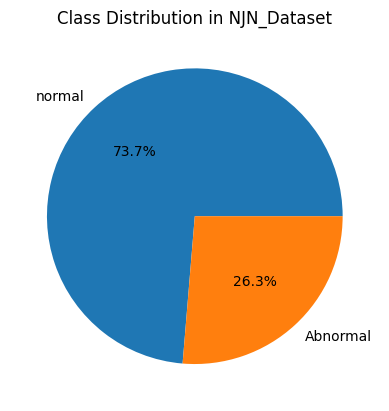

In [ ]:
import matplotlib.pyplot as plt

# Count the frequency of each class
class_counts = NJN_Dataset['Class'].value_counts()

# Plot a pie chart of the class proportions
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')

# Add title
plt.title('Class Distribution in NJN_Dataset')

# Show the plot
plt.show()

In [102]:
import os
from PIL import Image
import pandas as pd

# Define the paths to the image folders
NData = r"G:\My Drive\Project_NNJ_Full_version_july11\Project_NNJ\NData"
ANData = r"G:\My Drive\Project_NNJ_Full_version_july11\Project_NNJ\ANData"


# Create a list of all the image filenames in the NData folder
N_filenames = [os.path.join(NData, f) for f in os.listdir(NData) if f.endswith('.jpg')]

# Create a list of all the image filenames in the ANData folder
AN_filenames = [os.path.join(ANData, f) for f in os.listdir(ANData) if f.endswith('.jpg')]

# create a datframe containing N_filenames and AN_filenames with a column named 'class'
df = pd.DataFrame({'filename': N_filenames + AN_filenames, 'class': ['normal'] * len(N_filenames) + ['Abnormal'] * len(AN_filenames)})
df.head()

,filename,class
0,G:\My Drive\Project_NNJ_Full_version_july11\Pr...,normal
1,G:\My Drive\Project_NNJ_Full_version_july11\Pr...,normal
2,G:\My Drive\Project_NNJ_Full_version_july11\Pr...,normal
3,G:\My Drive\Project_NNJ_Full_version_july11\Pr...,normal
4,G:\My Drive\Project_NNJ_Full_version_july11\Pr...,normal


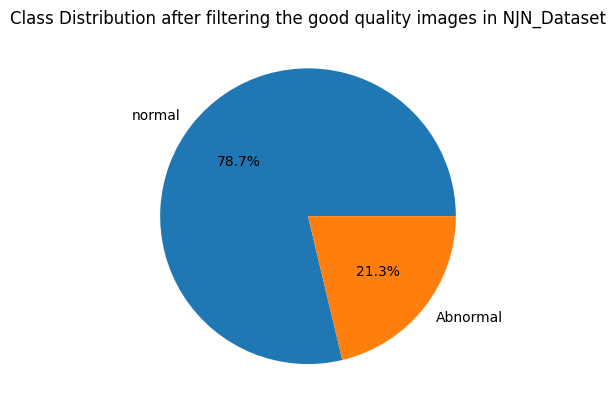

In [106]:
import matplotlib.pyplot as plt
# Count the frequency of each class
class_counts = df['class'].value_counts()

# Plot a pie chart of the class proportions
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')

# Add title
plt.title('Class Distribution after filtering the good quality images in NJN_Dataset')

# Show the plot
plt.show()

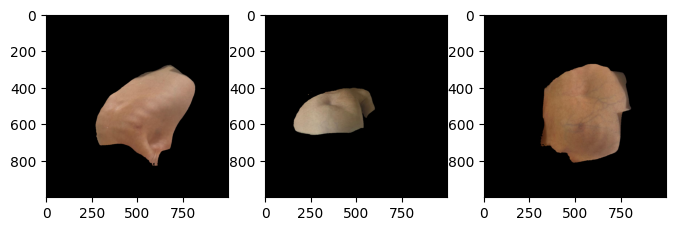

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# create four random images
img1 = cv2.imread("G:\My Drive\Project_NNJ_Full_version_july11\Project_NNJ\Segmented_Jaundice_images\Segmented_Jaundice_image_58.png")
img2 = cv2.imread("G:\My Drive\Project_NNJ_Full_version_july11\Project_NNJ\Segmented_Jaundice_images\Segmented_Jaundice_image_78.png")
img3 = cv2.imread("G:\My Drive\Project_NNJ_Full_version_july11\Project_NNJ\Segmented_Jaundice_images\Segmented_Jaundice_image_108.png")    
# img4 = np.random.randint(10, size=(10, 10))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# create a figure object with a size of 8x8 inches
fig = plt.figure(figsize=(8, 8))

# add four subplots to the figure, each with a size of 1x4
ax1 = fig.add_subplot(1, 3, 1) # first row, first column
ax2 = fig.add_subplot(1, 3, 2) # first row, second column
ax3 = fig.add_subplot(1, 3, 3) # first row, third column
# ax4 = fig.add_subplot(1, 4, 4) # first row, fourth column

# display the images on the subplots using imshow
ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(img3)
# ax4.imshow(img4)

# show the figure
plt.show()


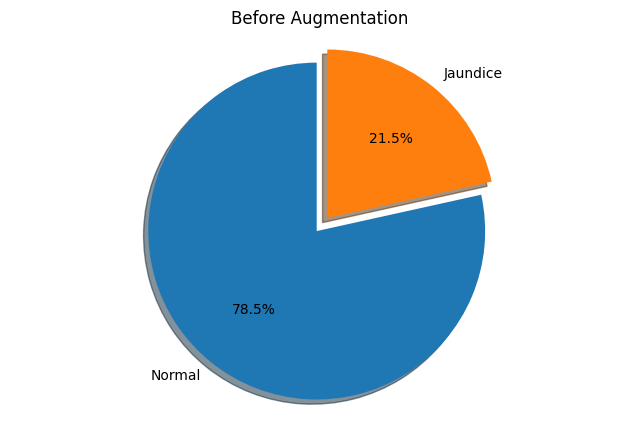

In [24]:
import os
import cv2  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# aug data visualization
normal_images = 102
jaundice_images = 28
aug_normal_images = 693
aug_jaundice_images = 580

# pie chart for data visualization
# 1st chart for normal and jaundice images
# 2nd one for both normal and jaundice images with augmented images with seperate plots but side by side
labels = 'Normal', 'Jaundice'
sizes = [normal_images, jaundice_images]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Jaundice')
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(8,5))
plt.subplot(1,1,1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Before Augmentation')


plt.show()








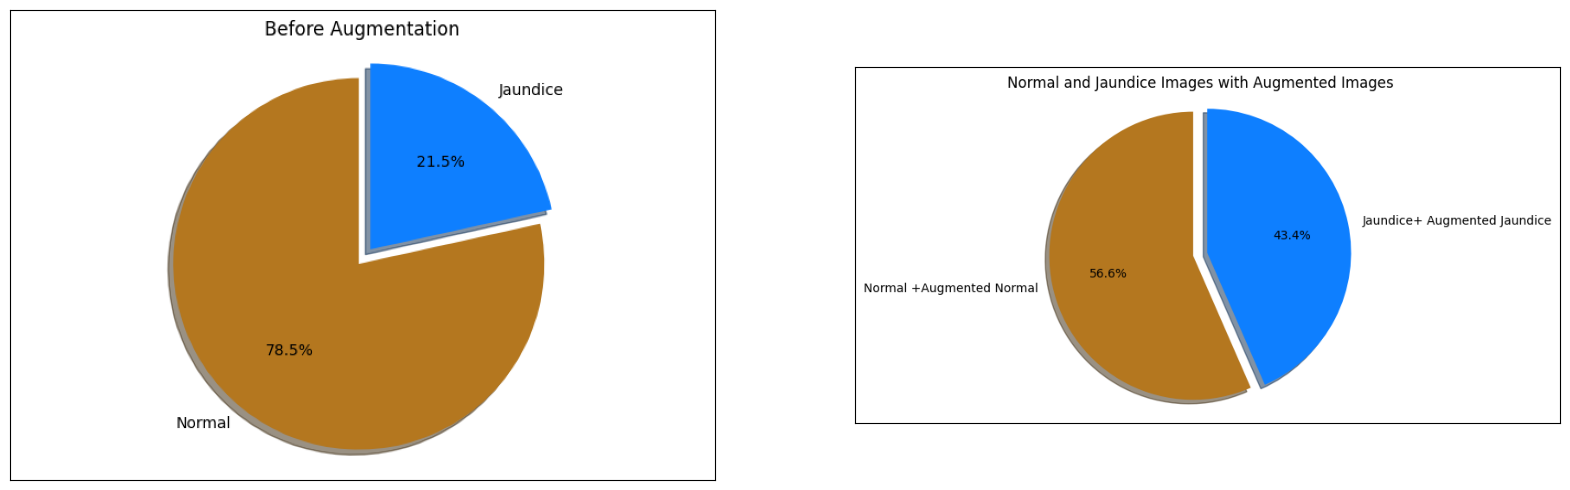

In [29]:
img1 = cv2.imread(r"C:\Users\yashw\OneDrive - Anglia Ruskin University\Msc Files\PGMP MAY-SEP\PGMP files\Project_code\NNJ\Project_NNJ_Full_version_july11-20230711T161256Z-001\pie_before_aug.png")
img2 = cv2.imread(r"G:\My Drive\Aug_images_pie.png")

# view the two images side by side without x and y axis with bold title and font size 20
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img1)
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2)
plt.xticks([]), plt.yticks([])
plt.show()


Using Histogram Equilize to balance the images

In [ ]:
import cv2

def is_image_rgb(image_path):
    # Load the image in BGR color space
    image_bgr = cv2.imread(image_path)

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Check if the pixel values are the same
    is_rgb = (image_bgr == image_rgb).all()

    return is_rgb
image_path = '../Project code/NNJ/Normal/normal/normal (1001).jpg'
is_rgb = is_image_rgb(image_path)
print(is_rgb)  # Output: True (if the image is in RGB color space), False (if the image is in BGR color space)


False


In [ ]:
combined_df

,Filename,Y,Cb,Cr,H,S,V,Class
0,normal (1).jpg,157.033465,139.423072,113.942096,36.811427,78.915971,179.486567,normal
1,normal (1000).jpg,150.623427,129.350993,126.185677,71.664867,42.929222,160.440209,normal
2,normal (1001).jpg,154.636441,128.016383,126.137845,71.369600,47.384488,165.222884,normal
3,normal (1002).jpg,163.393155,128.428119,127.630875,77.302657,20.680958,168.404964,normal
4,normal (1003).jpg,152.747798,130.230412,125.788338,60.832726,46.308383,165.112591,normal
...,...,...,...,...,...,...,...,...
555,normal (995).jpg,156.405699,130.094337,125.765021,60.264084,39.290935,167.215564,normal
556,normal (996).jpg,151.786365,131.376600,126.477389,69.046490,34.880899,162.519317,normal
557,normal (997).jpg,154.060428,129.902258,126.076600,60.515493,42.356377,166.115423,normal
558,normal (998).jpg,151.658714,131.925214,126.046637,66.223917,35.910217,162.712691,normal


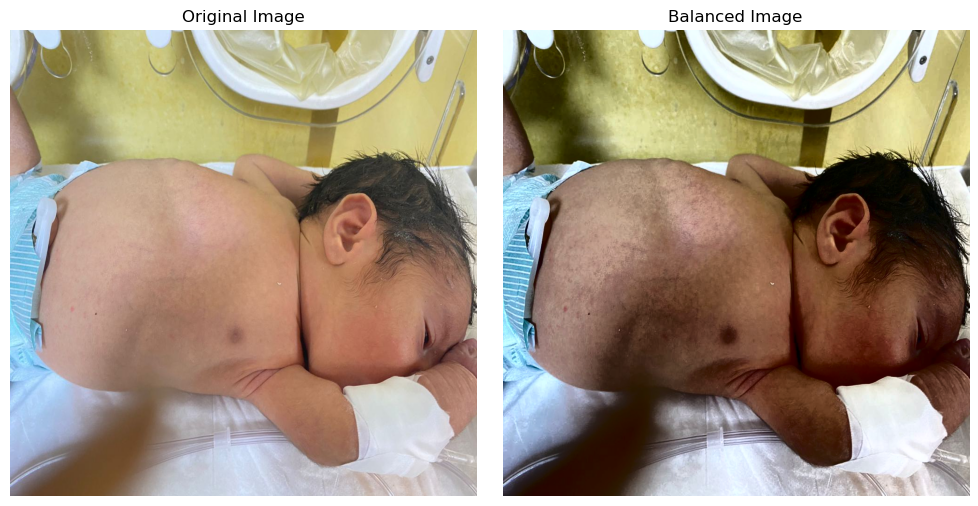

In [ ]:
# Histogram Equilisation
'''Histogram equalization is a technique used to enhance the contrast of an image by redistributing the pixel intensities.
It stretches the histogram of the image to cover the entire range of pixel values, resulting in a more balanced distribution
of intensities. This can improve the visual appearance of the image and make details more visible'''


import cv2
import numpy as np
import matplotlib.pyplot as plt

def balance_image(image):
    # Convert the image to the LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split the LAB channels
    L, A, B = cv2.split(lab)

    # Apply histogram equalization to the L channel
    L_eq = cv2.equalizeHist(L)

    # Merge the equalized L channel with the original A and B channels
    lab_eq = cv2.merge([L_eq, A, B])

    # Convert the LAB image back to the BGR color space
    balanced_image = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)

    return balanced_image

# Load the input image
image = cv2.imread('../Project code/NNJ/Normal/Filtered normal/normal (1).jpg')

# Balance the image
balanced_image = balance_image(image)
cv2.imwrite('output_image1.jpg', balanced_image)
# Display the original and balanced images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(balanced_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Balanced Image')
axes[1].axis('off')
plt.tight_layout()
plt.show()


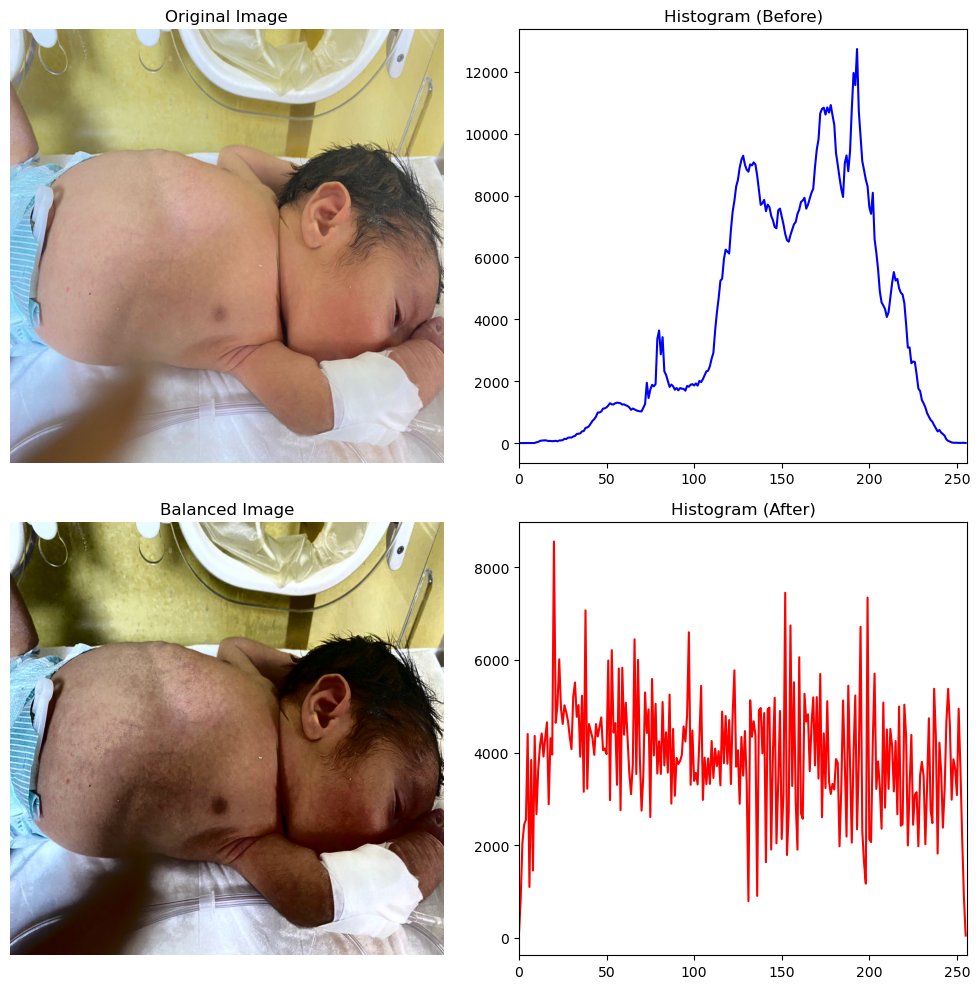

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def balance_image(image):
    # Convert the image to the LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split the LAB channels
    L, A, B = cv2.split(lab)

    # Apply histogram equalization to the L channel
    L_eq = cv2.equalizeHist(L)

    # Merge the equalized L channel with the original A and B channels
    lab_eq = cv2.merge([L_eq, A, B])

    # Convert the LAB image back to the BGR color space
    balanced_image = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)

    return balanced_image

# Load the input image
image = cv2.imread('../Project code/NNJ/Normal/Filtered normal/normal (1).jpg')

# Convert the image to grayscale for histogram plotting
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram of the original image
hist_before = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Balance the image
balanced_image = balance_image(image)

# Convert the balanced image to grayscale for histogram plotting
balanced_gray = cv2.cvtColor(balanced_image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram of the balanced image
hist_after = cv2.calcHist([balanced_gray], [0], None, [256], [0, 256])

# Display the histograms before and after histogram equalization
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')
axes[0, 1].plot(hist_before, color='b')
axes[0, 1].set_title('Histogram (Before)')
axes[0, 1].set_xlim([0, 256])
axes[1, 0].imshow(cv2.cvtColor(balanced_image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Balanced Image')
axes[1, 0].axis('off')
axes[1, 1].plot(hist_after, color='r')
axes[1, 1].set_title('Histogram (After)')
axes[1, 1].set_xlim([0, 256])
plt.tight_layout()
plt.show()


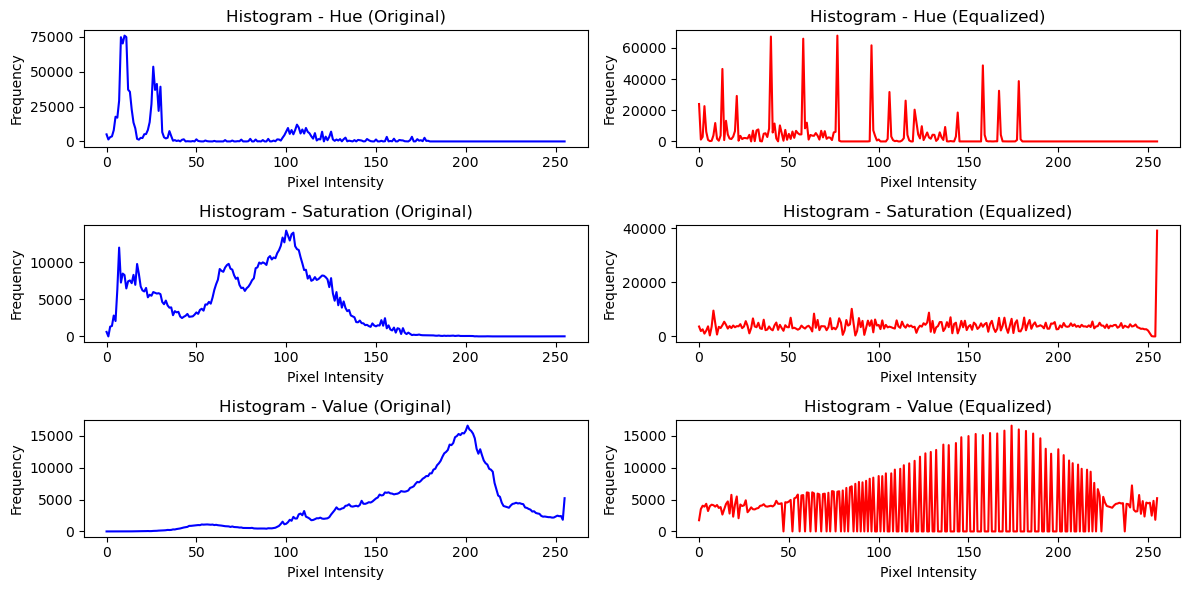

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def balance_image(image):
    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Split the HSV channels
    H, S, V = cv2.split(hsv)

    # Apply histogram equalization to all three channels (H, S, and V)
    H_eq = cv2.equalizeHist(H)
    S_eq = cv2.equalizeHist(S)
    V_eq = cv2.equalizeHist(V)

    # Merge the equalized channels back to obtain the balanced image in the HSV color space
    hsv_eq = cv2.merge([H_eq, S_eq, V_eq])

    # Convert the HSV image back to the BGR color space
    balanced_image = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2BGR)

    return balanced_image

# Load the input image
image = cv2.imread('../Project code/NNJ/Normal/Filtered normal/normal (1).jpg')

# Convert the image to the HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV channels
H, S, V = cv2.split(hsv)

# Calculate the histograms for all three channels (H, S, and V) of the original image
hist_h_orig = cv2.calcHist([H], [0], None, [256], [0, 256])
hist_s_orig = cv2.calcHist([S], [0], None, [256], [0, 256])
hist_v_orig = cv2.calcHist([V], [0], None, [256], [0, 256])

# Balance the image
balanced_image = balance_image(image)

# Convert the balanced image to the HSV color space
hsv_eq = cv2.cvtColor(balanced_image, cv2.COLOR_BGR2HSV)

# Split the equalized HSV channels
H_eq, S_eq, V_eq = cv2.split(hsv_eq)

# Calculate the histograms for all three channels (H, S, and V) of the balanced image
hist_h_eq = cv2.calcHist([H_eq], [0], None, [256], [0, 256])
hist_s_eq = cv2.calcHist([S_eq], [0], None, [256], [0, 256])
hist_v_eq = cv2.calcHist([V_eq], [0], None, [256], [0, 256])

# Plot the histograms for all three channels (H, S, and V) before and after histogram equalization
plt.figure(figsize=(12, 6))

plt.subplot(3, 2, 1)
plt.plot(hist_h_orig, color='b')
plt.title('Histogram - Hue (Original)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
plt.plot(hist_h_eq, color='r')
plt.title('Histogram - Hue (Equalized)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(3, 2, 3)
plt.plot(hist_s_orig, color='b')
plt.title('Histogram - Saturation (Original)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
plt.plot(hist_s_eq, color='r')
plt.title('Histogram - Saturation (Equalized)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(3, 2, 5)
plt.plot(hist_v_orig, color='b')
plt.title('Histogram - Value (Original)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(3, 2, 6)
plt.plot(hist_v_eq, color='r')
plt.title('Histogram - Value (Equalized)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The images are not equal.


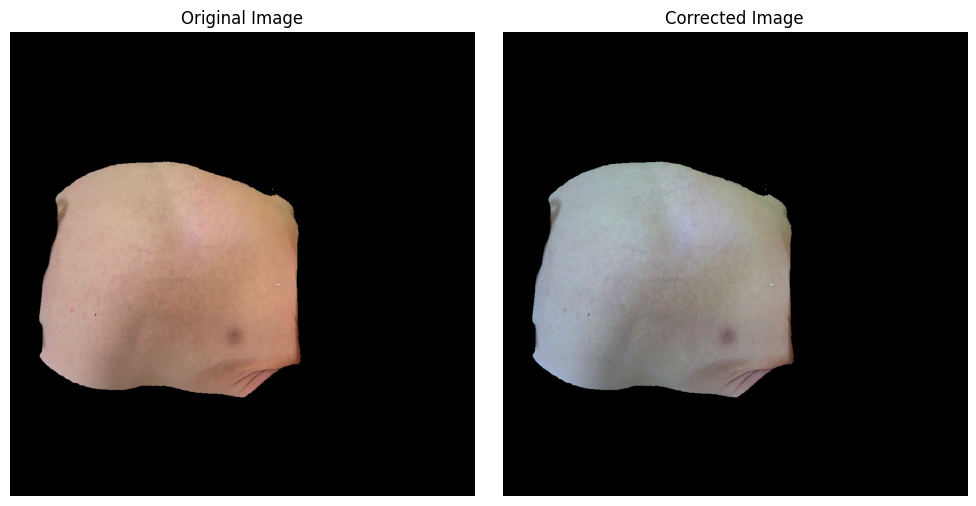

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
# Applying color constancy technique
'''The color constancy technique aims to correct for variations in illumination across an image,
making the colors appear more consistent and accurate. By scaling the image based on the average color,
the algorithm adjusts the image's color balance to minimize the impact of illumination variations.'''


def color_constancy(image):
    # Convert the image to float32 data type
    img_float = image.astype(np.float32)

    # Calculate the average color in the image
    avg_color = np.mean(img_float, axis=(0, 1))

    # Compute the scaling factors for each color channel
    scale = np.mean(avg_color) / avg_color

    # Scale the image by applying the color correction factors
    corrected_image = img_float * scale

    # Clip the pixel values to the valid range [0, 255]
    corrected_image = np.clip(corrected_image, 0, 255)

    # Convert the image back to uint8 data type
    corrected_image = corrected_image.astype(np.uint8)

    return corrected_image

# Load the input image
image = cv2.imread('G:\My Drive\Project_NNJ_Full_version_july11\Project_NNJ\Segmented_normal_images\Segmented_normal_image_1.png')

# Apply color constancy
corrected_image = color_constancy(image)
gray_image = cv2.cvtColor(corrected_image, cv2.COLOR_RGB2GRAY)

# Convert BGR to RGB for display with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
corrected_image_rgb = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB)

if image.shape == corrected_image_rgb.shape and (image == corrected_image_rgb).all():
    print("The images are equal.")
else:
    print("The images are not equal.")
cv2.imwrite('output_image.jpg', corrected_image_rgb)
# Display the original and corrected images using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(corrected_image_rgb)
axes[1].set_title('Corrected Image')
axes[1].axis('off')
plt.tight_layout()
plt.show()




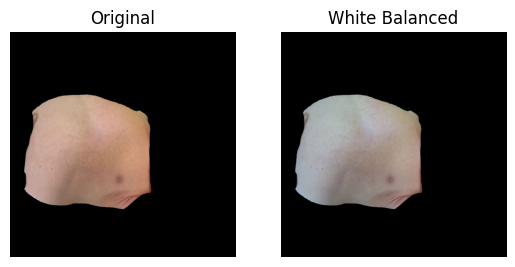

In [19]:
# Dynamic threshold white balancing-july27
'''The dynamic white balance is a method to correct the colors of an image that are affected by the lighting conditions. 
It tries to make the white objects in the image look white, and the other colors look natural. It does this by shifting 
the colors in the a and b channels of the LAB color space, which are related to the green-red and blue-yellow color dimensions. 
The amount of shift depends on three factors: the average values of the a and b channels in the whole image, which represent 
the overall color cast; the luminance value of each pixel, which represents the brightness; and the dynamic threshold factors, 
which represent how much correction you want to apply. The dynamic white balance algorithm loops over each pixel and calculates
how much to shift its a and b values based on these factors, and then merges the shifted channels with the original l channel 
to get the corrected image.'''
import cv2
import numpy as np

# Read the image
img = cv2.imread("G:\My Drive\Project_NNJ_Full_version_july11\Project_NNJ\Segmented_normal_images\Segmented_normal_image_1.png")

# Convert to LAB color space
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Split the channels
l, a, b = cv2.split(lab)

# Find the average values of a and b channels
avg_a = np.average(a)
avg_b = np.average(b)

# Define the dynamic threshold factors
factor_a = 1.2 # Adjust this value according to your needs
factor_b = 1.2 # Adjust this value according to your needs

# Loop over the pixels and shift the a and b values
for x in range(lab.shape[0]):
    for y in range(lab.shape[1]):
        # Get the luminance value
        l_value = l[x][y] / 255.0
        
        # Shift the a value
        shift_a = (avg_a - 128) * l_value * factor_a
        a[x][y] = a[x][y] - shift_a
        
        # Shift the b value
        shift_b = (avg_b - 128) * l_value * factor_b
        b[x][y] = b[x][y] - shift_b

# Merge the channels
lab = cv2.merge((l, a, b))

# Convert back to BGR color space
img_wb = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)



# Show the original and white balanced images
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_wb, cv2.COLOR_BGR2RGB))
plt.title("White Balanced")
plt.axis("off")
plt.show()
